In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load dataset
df = pd.read_excel('/content/historical_data(2).csv.xlsx')


In [5]:
df.info()
df.shape
df.head()
df.dtypes
df.isna().sum().sort_values(ascending=False)
df['Timestamp IST'] = pd.to_datetime(df['Timestamp IST'], errors='coerce')
df.describe(include='all').T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Account,211224,32,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,40184,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Coin,211224,246,HYPE,68005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Execution Price,211224.0,NaN,NaN,NaN,11414.72335,0.000005,4.8547,18.28,101.58,109004.0,29447.654868
Size Tokens,211224.0,NaN,NaN,NaN,4623.364979,0.000001,2.94,32.0,187.9025,15822438.0,104272.88953
Size USD,211224.0,NaN,NaN,NaN,5639.45121,0.0,193.79,597.045,2058.96,3921430.72,36575.138546
Side,211224,2,SELL,108528,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Timestamp IST,211224,NaN,NaN,NaN,2025-01-31 12:04:22.915009792,2023-05-01 01:06:00,2024-12-31 21:00:45,2025-02-24 18:55:00,2025-04-02 18:22:00,2025-05-01 12:13:00,NaN
Start Position,211224.0,NaN,NaN,NaN,-29946.248839,-14334629.0,-376.231075,84.727932,9337.2775,30509482.0,673807.423736
Direction,211224,12,Open Long,49895,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Closed PnL,211224.0,NaN,NaN,NaN,48.749001,-117990.1041,0.0,0.0,5.792797,135329.0901,919.164828


In [6]:
if 'timestamp_ist' in df.columns:
    df['timestamp_ist'] = pd.to_datetime(df['timestamp_ist'], errors='coerce')
df = df.drop_duplicates()
for col in ['account','coin','side','direction','transaction_hash','crossed']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()
for col in ['execution_price','size_tokens','size_usd','start_position','closed_pnl','fee']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
report = {
    'rows': df.shape[0],
    'missing_per_col': df.isna().sum().to_dict()
}
report


{'rows': 211224,
 'missing_per_col': {'Account': 0,
  'Coin': 0,
  'Execution Price': 0,
  'Size Tokens': 0,
  'Size USD': 0,
  'Side': 0,
  'Timestamp IST': 0,
  'Start Position': 0,
  'Direction': 0,
  'Closed PnL': 0,
  'Transaction Hash': 0,
  'Order ID': 0,
  'Crossed': 0,
  'Fee': 0,
  'Trade ID': 0,
  'Timestamp': 0}}

In [7]:
df['Account'].nunique()
top_accounts = df['Account'].value_counts().head(20)
top_accounts

,count
Account,
0xbee1707d6b44d4d52bfe19e41f8a828645437aab,40184
0xbaaaf6571ab7d571043ff1e313a9609a10637864,21192
0xa0feb3725a9335f49874d7cd8eaad6be45b27416,15605
0x8477e447846c758f5a675856001ea72298fd9cb5,14998
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,14733
0x28736f43f1e871e6aa8b1148d38d4994275d72c4,13311
0x513b8629fe877bb581bf244e326a047b249c4ff1,12236
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,9893
0x47add9a56df66b524d5e2c1993a43cde53b6ed85,8519


In [10]:
import numpy as np
epsilon = 1e-9

coin_summary = (
    df.groupby('Coin').agg(
        trades=('Coin', 'size'),
        total_usd=('Size USD', 'sum'),
        avg_price=('Execution Price', 'mean'),
        total_pnl=('Closed PnL', 'sum'),
        total_fee=('Fee', 'sum')
    )
)
coin_summary['avg_fee_pct'] = coin_summary.apply(
    lambda row: (row['total_fee'] / (row['total_usd'] + epsilon))
                if row['total_usd'] > 0 else np.nan,
    axis=1
)
coin_summary = coin_summary.sort_values('total_usd', ascending=False)
coin_summary.head(10)



,trades,total_usd,avg_price,total_pnl,total_fee,avg_fee_pct
Coin,,,,,,
BTC,26064,6.442321e+08,86454.455801,8.680447e+05,139224.226804,0.000216
HYPE,68005,1.419902e+08,18.382012,1.948485e+06,25361.930440,0.000179
SOL,10691,1.250748e+08,159.115894,1.639556e+06,27956.304402,0.000224
ETH,11158,1.182810e+08,2656.719188,1.319979e+06,23091.303645,0.000195
@107,29992,5.576086e+07,21.529569,2.783913e+06,5953.224788,0.000107
FARTCOIN,4650,8.311390e+06,0.927592,-1.006872e+05,2357.939012,0.000284
SUI,1979,7.781168e+06,3.658196,1.992688e+05,2003.206129,0.000257
TRUMP,1920,7.349347e+06,17.552389,-3.648249e+05,1729.745411,0.000235
MELANIA,4428,7.040710e+06,1.224895,3.903511e+05,1010.388542,0.000144


In [11]:
df['Execution Price'].describe()
invalid_price = df[df['Execution Price'] <= 0]
df['price_z'] = df.groupby('Coin')['Execution Price'].transform(lambda x: (x - x.mean())/x.std(ddof=0))
outliers = df[ df['price_z'].abs() > 4 ]


In [12]:
df[['Size Tokens','Size USD']].corr()
large_token_trades = df.nlargest(100, 'Size Tokens')


In [13]:
df['Size USD'].describe()
top_notional = df.nlargest(50, 'Size USD')
df['notional_bucket'] = pd.cut(df['Size USD'], bins=[0,50,500,5000,1e9])
notional_by_coin = df.groupby('Coin')['Size USD'].sum().sort_values(ascending=False)


In [14]:
side_stats = df.groupby('Side').agg(trades=('Side','size'), total_usd=('Size USD','sum'), total_pnl=('Closed PnL','sum'))
win_rate_by_side = df.groupby('Side').apply(lambda g: (g['Closed PnL']>0).mean())
side_stats

/tmp/ipython-input-1206317785.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  win_rate_by_side = df.groupby('Side').apply(lambda g: (g['Closed PnL']>0).mean())


,trades,total_usd,total_pnl
Side,,,
BUY,102696,5.923191e+08,3.707811e+06
SELL,108528,5.988684e+08,6.589148e+06


In [15]:
df['date'] = df['Timestamp IST'].dt.date
df['hour'] = df['Timestamp IST'].dt.hour
df['weekday'] = df['Timestamp IST'].dt.weekday
daily = df.set_index('Timestamp IST').resample('D').agg({'Size USD':'sum','Closed PnL':'sum'})
hourly_heat = df.groupby(['weekday','hour'])['Size USD'].sum().unstack(fill_value=0)


In [16]:
pct_negative = (df['Start Position'] < 0).mean()
pct_zero = (df['Start Position'] == 0).mean()
suspicious = df[(df['Start Position']==0) & (df['Closed PnL']!=0)]
df['position_type'] = np.where(df['Start Position'] < 0, 'short', np.where(df['Start Position'] == 0, 'zero', 'long'))
pct_negative
pct_zero

np.float64(0.019339658372154678)

In [17]:
df['Direction'].value_counts()
pd.crosstab(df['Side'], df['Direction'])


Direction,Auto-Deleveraging,Buy,Close Long,Close Short,Liquidated Isolated Short,Long > Short,Open Long,Open Short,Sell,Settlement,Short > Long,Spot Dust Conversion
Side,,,,,,,,,,,,
BUY,0,16716,0,36013,1,0,49895,0,0,1,70,0
SELL,8,0,48678,0,0,57,0,39741,19902,0,0,142


In [18]:
wins = df[df['Closed PnL'] > 0]
losses = df[df['Closed PnL'] < 0]
win_rate = len(wins) / (len(wins) + len(losses))
avg_win = wins['Closed PnL'].mean()
avg_loss = losses['Closed PnL'].mean()
df['cum_pnl'] = df.sort_values('Timestamp IST').groupby('Account')['Closed PnL'].cumsum()

In [19]:
dupe_trans = df[df.duplicated(subset=['Transaction Hash'], keep=False)]
df['transaction_unique'] = ~df.duplicated(subset=['Transaction Hash'])


In [20]:
order_counts = df.groupby('Order ID').size().sort_values(ascending=False).head(20)
order_level = df.groupby('Order ID').agg(total_usd=('Size USD','sum'), total_pnl=('Closed PnL','sum'), n_trades=('Order ID','size'))
order_counts

,0
Order ID,
61636246980,390
78766167752,372
76557824768,366
86618342363,354
78766120810,298
88683244072,298
89609661670,254
79154664708,251
85278836101,242


In [21]:
df['Crossed'] = df['Crossed'].astype(bool)
df.groupby('Crossed').agg(trades=('Crossed','size'), avg_fee=('Fee','mean'), avg_pnl=('Closed PnL','mean'))


,trades,avg_fee,avg_pnl
Crossed,,,
False,82821,0.215088,69.090300
True,128403,1.776002,35.628694


In [22]:
df['fee_pct'] = df['Fee'] / df['Size USD'].replace(0, np.nan)
df['fee_pct'].describe()
high_fee = df[df['fee_pct'] > df['fee_pct'].quantile(0.99)]
high_fee

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Timestamp,price_z,notional_bucket,date,hour,weekday,position_type,cum_pnl,transaction_unique,fee_pct
17064,0x083384f897ee0f19899168e3b1bec365f52a9012,ETH,2541.00000,0.00400,10.16,BUY,2025-02-25 03:40:00,-1524.77400,Close Short,0.62244,...,1740000000000,-0.169432,"(0.0, 50.0]",2025-02-25,3,1,short,488193.175614,False,0.000350
18047,0x430f09841d65beb3f27765503d0f850b8bce7713,PURR/USDC,0.13097,22382.00000,2931.37,BUY,2024-04-20 12:28:00,0.00000,Buy,0.00000,...,1710000000000,-1.040283,"(500.0, 5000.0]",2024-04-20,12,5,zero,0.000000,True,0.002672
18048,0x430f09841d65beb3f27765503d0f850b8bce7713,PURR/USDC,0.13100,447.00000,58.56,BUY,2024-04-20 12:28:00,22374.00000,Buy,0.00000,...,1710000000000,-1.040088,"(50.0, 500.0]",2024-04-20,12,5,long,0.000000,False,0.002671
18049,0x430f09841d65beb3f27765503d0f850b8bce7713,PURR/USDC,0.13100,503.00000,65.89,BUY,2024-04-20 12:28:00,22821.00000,Buy,0.00000,...,1710000000000,-1.040088,"(50.0, 500.0]",2024-04-20,12,5,long,0.000000,True,0.000763
18050,0x430f09841d65beb3f27765503d0f850b8bce7713,PURR/USDC,0.13100,39139.00000,5127.21,BUY,2024-04-20 12:28:00,23323.00000,Buy,0.00000,...,1710000000000,-1.040088,"(5000.0, 1000000000.0]",2024-04-20,12,5,long,0.000000,True,0.000763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203019,0x92f17e8d81a944691c10e753af1b1baae1a2cd0d,FARTCOIN,1.17880,16.30000,19.21,BUY,2025-04-23 03:30:00,535248.60000,Open Long,0.00000,...,1750000000000,0.833530,"(0.0, 50.0]",2025-04-23,3,2,long,109197.778134,False,0.000350
205300,0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3,BTC,77359.00000,0.00015,11.60,BUY,2025-04-09 21:32:00,24.51470,Open Long,0.00000,...,1740000000000,-0.659410,"(0.0, 50.0]",2025-04-09,21,2,long,292422.912522,False,0.000350
205301,0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3,BTC,77360.00000,0.00015,11.60,BUY,2025-04-09 21:32:00,24.51485,Open Long,0.00000,...,1740000000000,-0.659338,"(0.0, 50.0]",2025-04-09,21,2,long,292422.912522,False,0.000350
205302,0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3,BTC,77361.00000,0.00015,11.60,BUY,2025-04-09 21:32:00,24.51500,Open Long,0.00000,...,1740000000000,-0.659265,"(0.0, 50.0]",2025-04-09,21,2,long,292422.912522,False,0.000350


In [23]:
df['Trade ID'].nunique()
trades_per_order = df.groupby('Order ID')['Trade ID'].nunique().sort_values(ascending=False).head(20)
trades_per_order

,Trade ID
Order ID,
76557824768,311
78766167752,299
61636246980,296
86618342363,280
78766120810,246
88683244072,242
79154664708,217
89609661670,215
85278836101,206


In [24]:
df['incomplete_trade'] = (df['Start Position']==0) & (df['Closed PnL']==0) & (df['Fee']==0)
df['needs_investigation'] = ((df['Start Position']==0) & (df['Closed PnL']!=0)) | (df['Execution Price']<=0) | (df['Size USD']<=0)
incomplete_trades=df[df['incomplete_trade']]
needs_investigation=df[df['needs_investigation']]

In [25]:
incomplete_trades
needs_investigation

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,notional_bucket,date,hour,weekday,position_type,cum_pnl,transaction_unique,fee_pct,incomplete_trade,needs_investigation
22820,0x4f93fead39b70a1824f981a54d4e55b278e9f760,@17,0.000131,31.434320,0.0,SELL,2024-07-24 05:30:00,31.434320,Spot Dust Conversion,0.0,...,NaN,2024-07-24,5,2,long,56312.518156,False,NaN,False,True
22824,0x4f93fead39b70a1824f981a54d4e55b278e9f760,@24,0.000158,20.268280,0.0,SELL,2024-07-24 05:30:00,20.268280,Spot Dust Conversion,0.0,...,NaN,2024-07-24,5,2,long,56312.518156,False,NaN,False,True
22827,0x4f93fead39b70a1824f981a54d4e55b278e9f760,@31,0.000021,201.954140,0.0,SELL,2024-07-24 05:30:00,201.954140,Spot Dust Conversion,0.0,...,NaN,2024-07-24,5,2,long,56312.518156,False,NaN,False,True
22829,0x4f93fead39b70a1824f981a54d4e55b278e9f760,@34,0.003047,0.202573,0.0,SELL,2024-07-24 05:30:00,0.202573,Spot Dust Conversion,0.0,...,NaN,2024-07-24,5,2,long,56312.518156,False,NaN,False,True
22831,0x4f93fead39b70a1824f981a54d4e55b278e9f760,@37,0.000040,120.896630,0.0,SELL,2024-07-24 05:30:00,120.896630,Spot Dust Conversion,0.0,...,NaN,2024-07-24,5,2,long,56312.518156,False,NaN,False,True
22961,0x4f93fead39b70a1824f981a54d4e55b278e9f760,@44,0.004080,1.002730,0.0,SELL,2024-07-27 05:30:00,1.002730,Spot Dust Conversion,0.0,...,NaN,2024-07-27,5,5,long,62713.141812,True,NaN,False,True
23161,0x4f93fead39b70a1824f981a54d4e55b278e9f760,@53,0.000402,6.029794,0.0,SELL,2024-08-13 05:30:00,6.029794,Spot Dust Conversion,0.0,...,NaN,2024-08-13,5,1,long,-37816.225804,False,NaN,False,True
44168,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,@2,0.000052,1.328790,0.0,SELL,2024-07-24 05:30:00,1.328790,Spot Dust Conversion,0.0,...,NaN,2024-07-24,5,2,long,59744.135261,False,NaN,False,True
55284,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,PURR/USDC,0.163590,0.000110,0.0,SELL,2025-02-02 05:30:00,0.000110,Spot Dust Conversion,0.0,...,NaN,2025-02-02,5,6,long,54405.295707,False,NaN,False,True
83840,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,@10,0.000286,0.968033,0.0,SELL,2024-08-07 05:30:00,0.968033,Spot Dust Conversion,0.0,...,NaN,2024-08-07,5,2,long,-5348.261342,False,NaN,False,True


In [26]:
df['pnl_pct'] = df['Closed PnL'] / df['Size USD'].replace(0, np.nan)
df['signed_notional'] = df['Size USD'] * np.sign(df['Start Position'])
df['holding_hours'] = (df.get('close_timestamp', df['Timestamp IST']) - df['Timestamp IST']).dt.total_seconds()/3600
df['hour'] = df['Timestamp IST'].dt.hour
df['weekday'] = df['Timestamp IST'].dt.weekday


/tmp/ipython-input-3721808041.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Coin'].isin(top10_coins)],


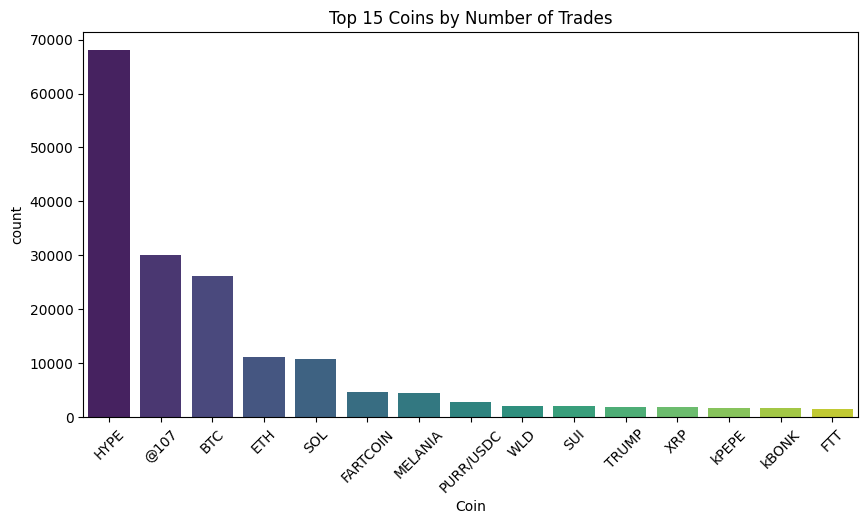

In [27]:
#top 15 coins by number of trades
top10_coins = df['Coin'].value_counts().nlargest(15).index

plt.figure(figsize=(10,5))
sns.countplot(data=df[df['Coin'].isin(top10_coins)],
              x='Coin',
              order=top10_coins,
              palette="viridis")
plt.title("Top 15 Coins by Number of Trades")
plt.xticks(rotation=45)
plt.show()



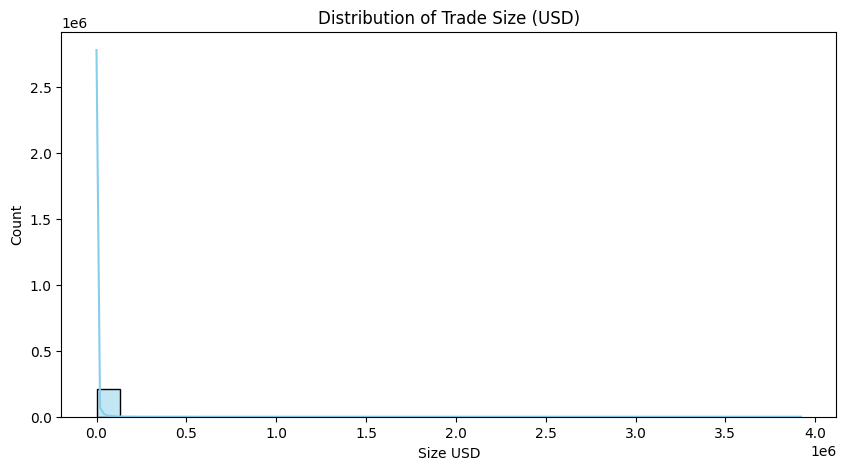

In [28]:
plt.figure(figsize=(10,5))
sns.histplot(df['Size USD'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Trade Size (USD)")
plt.show()

The distribution is heavily skewed to the left, indicating that most trades have a small size in USD.
There is a long tail to the right, suggesting that there are some trades with very large USD sizes, although they are less frequent. now i am see the clearly to the distribution

/tmp/ipython-input-1812374893.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_notional.head(15).index, y=top_notional.head(15)['Size USD'], palette='viridis')


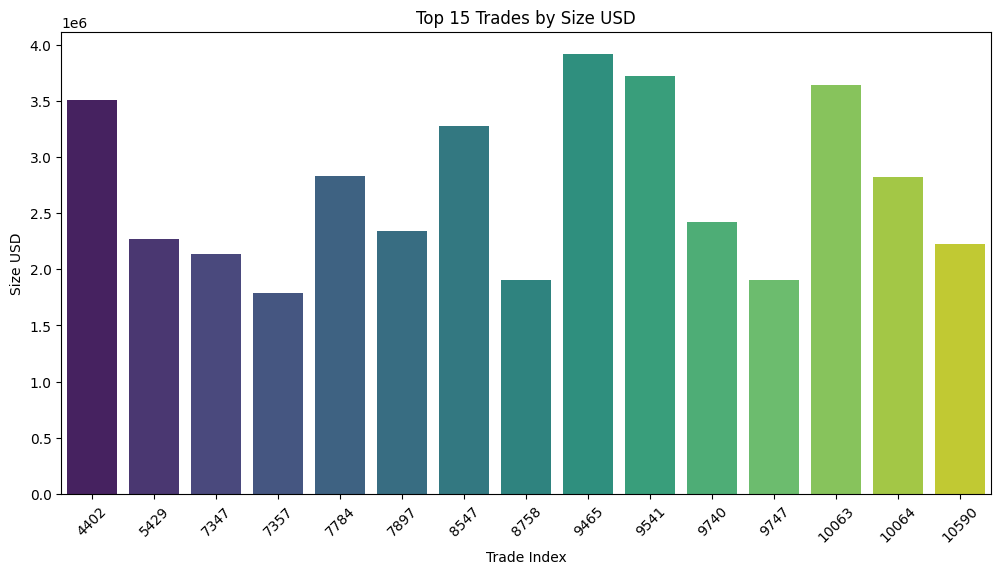

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_notional.head(15).index, y=top_notional.head(15)['Size USD'], palette='viridis')
plt.title('Top 15 Trades by Size USD')
plt.xlabel('Trade Index')
plt.ylabel('Size USD')
plt.xticks(rotation=45)
plt.show()

The histogram of the overall distribution showed that most trades are concentrated at the lower end of the 'Size USD' scale, with a long tail of larger trades.
The "Top 15 Trades by Size USD" plot effectively zooms in on that long tail, showing the individual values of the largest trades.
This comparison confirms that while the vast majority of trades are small, there are a few extremely large trades that have a significant impact on the total volume.

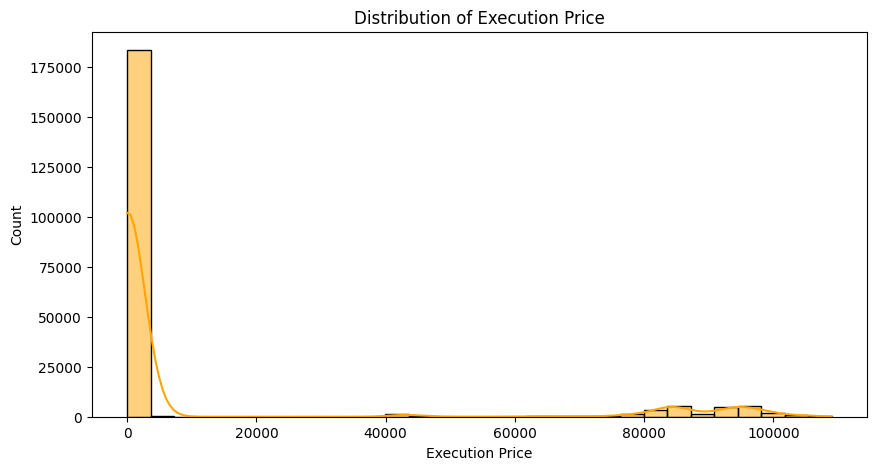

In [30]:
plt.figure(figsize=(10,5))
sns.histplot(df['Execution Price'], bins=30, kde=True, color='orange')
plt.title("Distribution of Execution Price")
plt.show()


This means that the vast majority of trades happen at lower execution prices.
There is a very long tail extending to the right, indicating that there are some trades that occur at extremely high execution prices, but these are much less frequent.

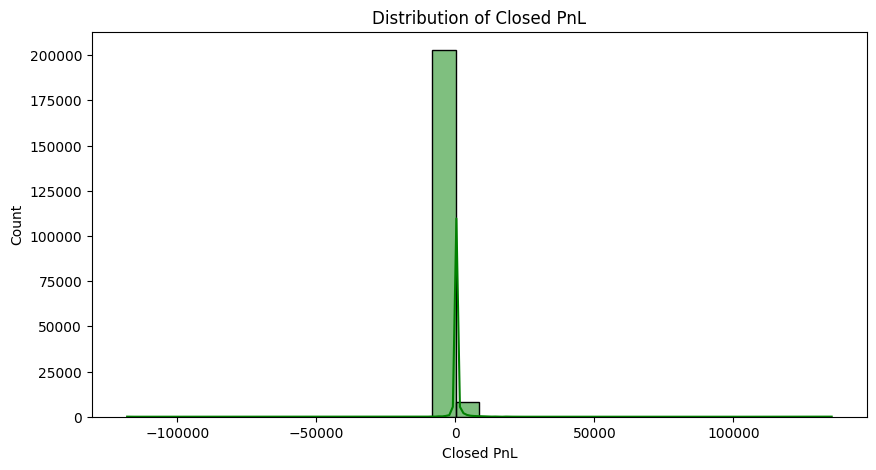

In [31]:
plt.figure(figsize=(10,5))
sns.histplot(df['Closed PnL'], bins=30, kde=True, color='green')
plt.title("Distribution of Closed PnL")
plt.show()


The distribution is heavily concentrated around zero, indicating that a large number of trades resulted in a PnL close to zero.
There are tails extending both to the left (negative PnL, representing losses) and to the right (positive PnL, representing gains).
The tails are relatively long, suggesting that while most trades have small PnL values, there are some trades with significant profits or losses.
The distribution appears somewhat symmetric around zero, but a more detailed analysis would be needed to determine if there's a slight bias towards positive or negative PnL overall.

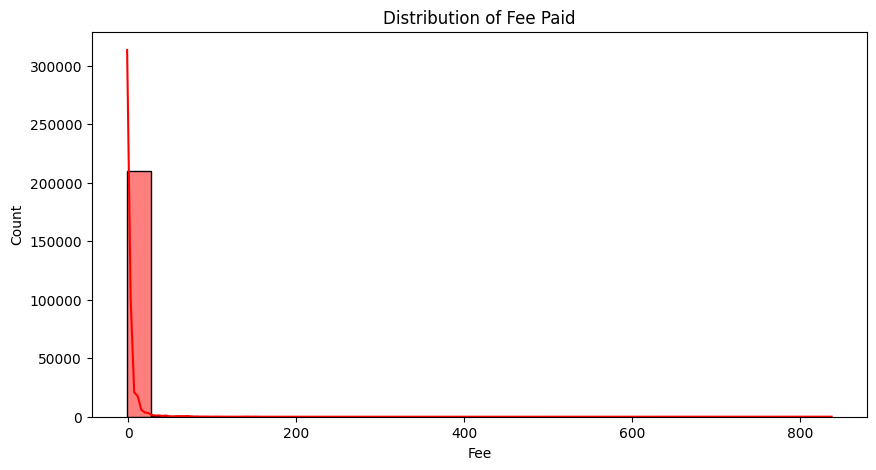

In [32]:
plt.figure(figsize=(10,5))
sns.histplot(df['Fee'], bins=30, kde=True, color='red')
plt.title("Distribution of Fee Paid")
plt.show()


The distribution is heavily skewed to the left, with a large concentration of trades having very low fees.
There is a long tail extending to the right, indicating that a smaller number of trades incurred significantly higher fees.

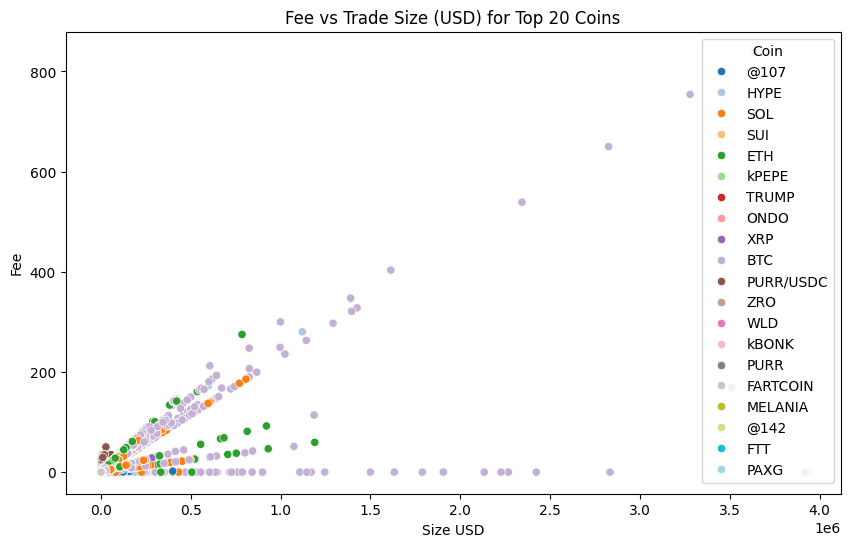

In [33]:
#Bivariate Analysis
plt.figure(figsize=(10,6))
top20_coins = df['Coin'].value_counts().nlargest(20).index
sns.scatterplot(data=df[df['Coin'].isin(top20_coins)], x='Size USD', y='Fee', hue='Coin', palette='tab20')
plt.title("Fee vs Trade Size (USD) for Top 20 Coins")
plt.show()

General Trend: There appears to be a general positive correlation between 'Size USD' and 'Fee'. As the trade size in USD increases, the fee also tends to increase. This is expected, as fees are often calculated as a percentage of the trade value.

Variations by Coin: Different coins seem to have different fee structures or typical trade sizes, as the clusters of points for each coin are located in different areas of the plot. Some coins show a wider range of trade sizes and fees than others.

Outliers: There are some points that appear to be outliers, with unusually high fees for their size or vice versa. These might be worth investigating further to understand why the fees are so different.

Concentration of Trades: For most coins, there is a concentration of trades at the lower end of the 'Size USD' scale, which aligns with the earlier observation from the distribution of trade size histogram.

/tmp/ipython-input-2370750637.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df[df['Account'].isin(top20_accounts_list)], x='Size USD', y='Closed PnL', palette='tab20')


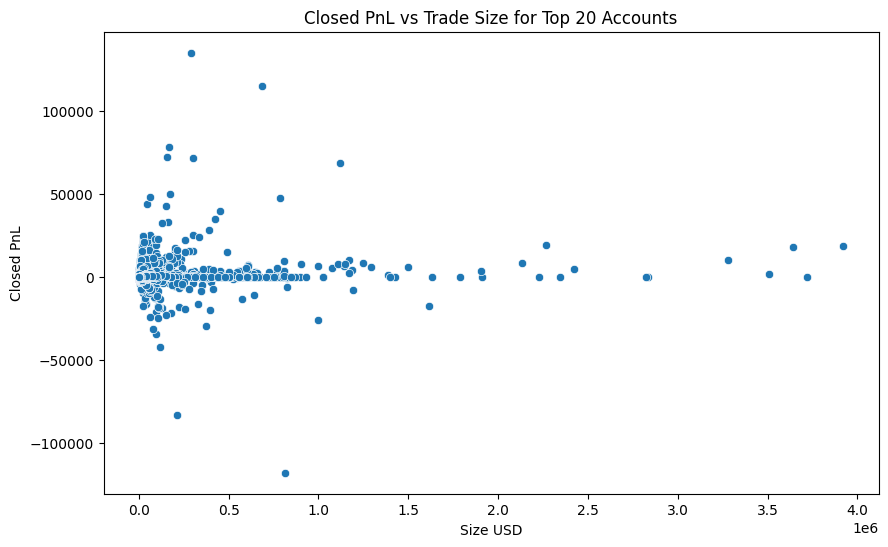

In [34]:
plt.figure(figsize=(10,6))
top20_accounts_list = top_accounts.index.tolist()
sns.scatterplot(data=df[df['Account'].isin(top20_accounts_list)], x='Size USD', y='Closed PnL', palette='tab20')
plt.title("Closed PnL vs Trade Size for Top 20 Accounts")
plt.show()

Wide Range of PnL: For the top accounts, there is a wide range of Closed PnL values for different trade sizes. Some large trades result in significant profits, while others result in significant losses.
 Concentration at Lower Trade Sizes: Similar to the overall distribution, there is a high concentration of trades at the lower end of the 'Size USD' scale for most of the top accounts. These smaller trades generally have PnL values closer to zero, although some still show notable gains or losses.
 Larger Trades, Larger Potential PnL: The trades with larger 'Size USD' values tend to have a wider spread of PnL, indicating that larger trades carry the potential for both larger profits and larger losses.
 Account-Specific Patterns: Different accounts show different patterns in their trading size and resulting PnL. Some accounts might have a higher frequency of smaller trades, while others might engage in larger, potentially more volatile trades. The coloring by account helps to visually identify if certain accounts are associated with specific trade size or PnL ranges.

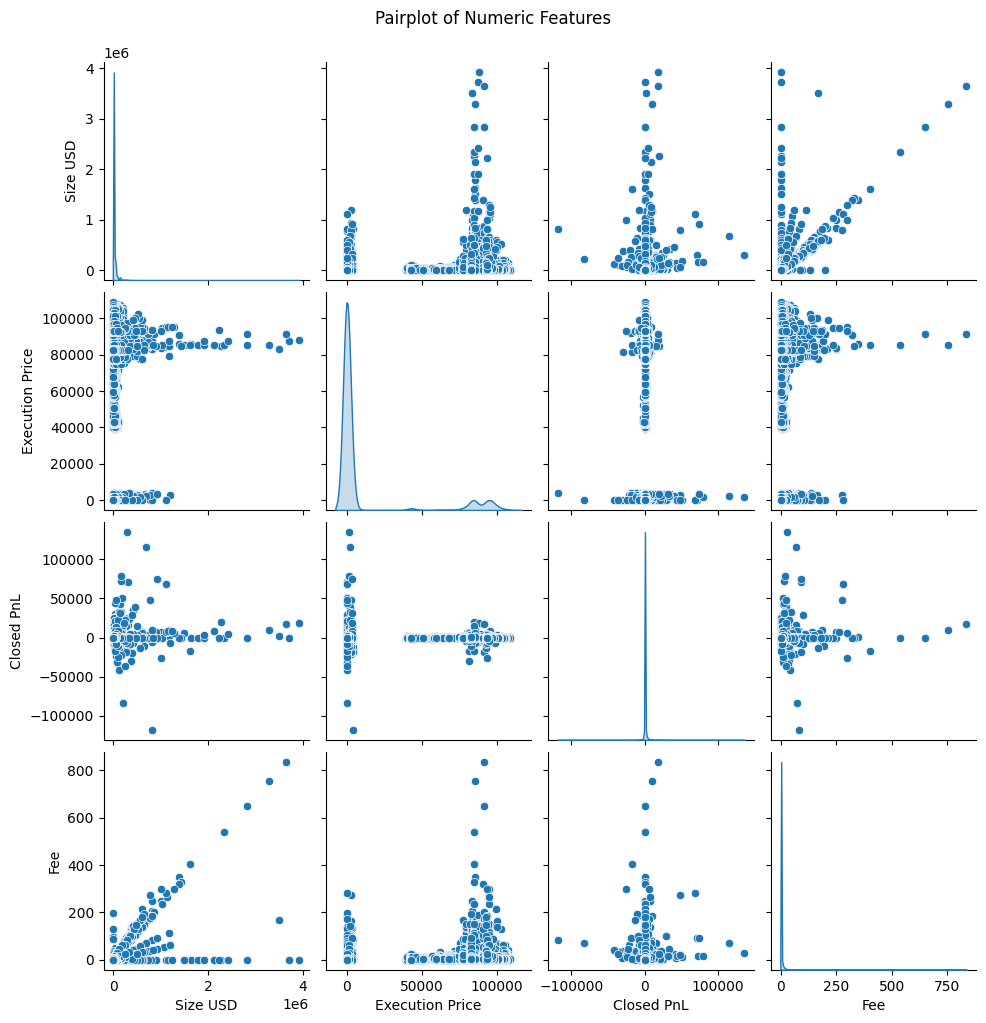

In [35]:
sns.pairplot(df[['Size USD', 'Execution Price', 'Closed PnL', 'Fee']], kind='scatter', diag_kind='kde')
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()


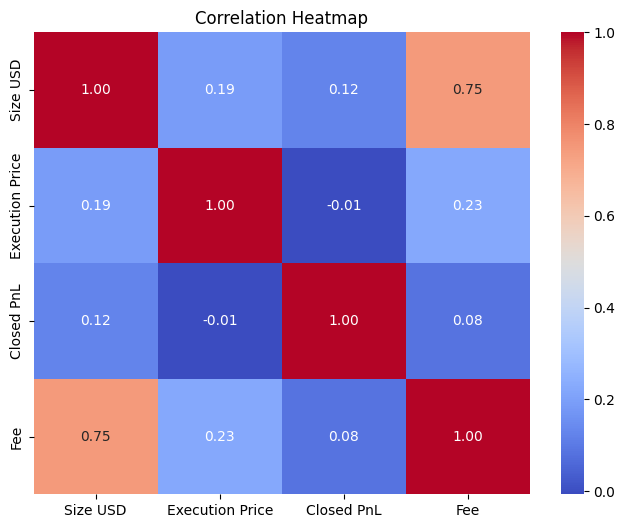

In [36]:
plt.figure(figsize=(8,6))
corr = df[['Size USD', 'Execution Price', 'Closed PnL', 'Fee']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


/tmp/ipython-input-2914541788.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top20, x='Coin', y='Closed PnL', palette='Set3')


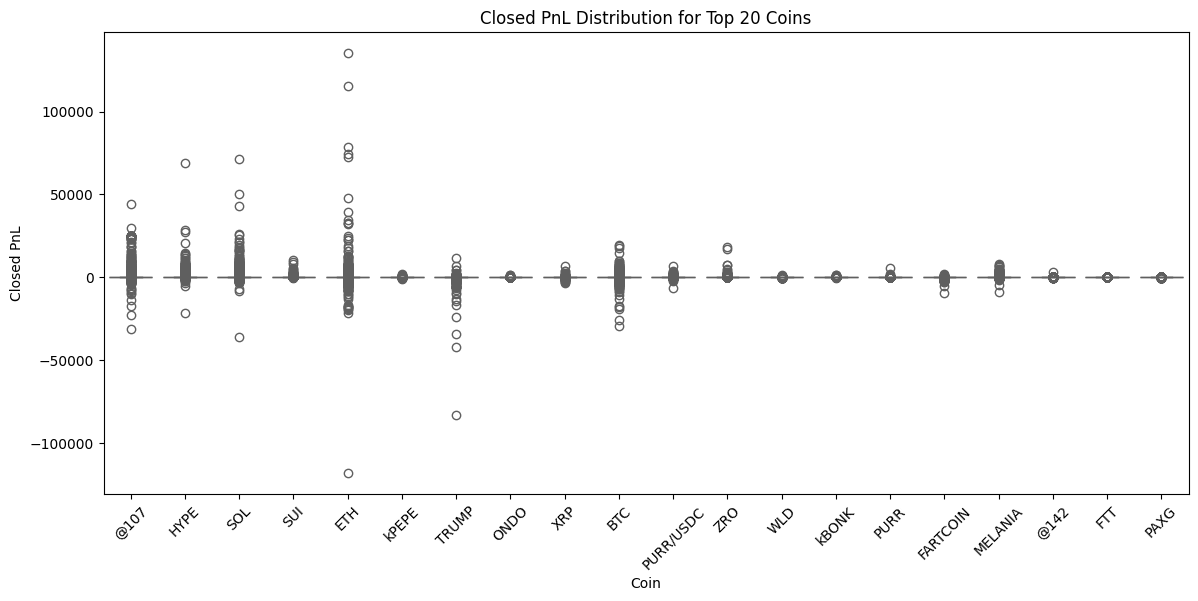

In [37]:
# Get top 20 coins by number of trades
top20_coins = df['Coin'].value_counts().nlargest(20).index
df_top20 = df[df['Coin'].isin(top20_coins)]

plt.figure(figsize=(14,6))
sns.boxplot(data=df_top20, x='Coin', y='Closed PnL', palette='Set3')
plt.title("Closed PnL Distribution for Top 20 Coins")
plt.xticks(rotation=45)
plt.show()



In [38]:
 # Target: 1 = profitable, 0 = unprofitable
df['Profit_Label'] = (df['Closed PnL'] > 0).astype(int)

features = [
    'Execution Price', 'Size Tokens', 'Size USD', 'Fee', 'Start Position',
    'Side', 'Direction', 'Coin', 'Crossed'  # You can include 'Crossed' as boolean
]

# One-hot encode categorical features and drop first to avoid collinearity
X = pd.get_dummies(df[features], drop_first=True)
y = df['Profit_Label']


In [39]:
split_date = df['Timestamp IST'].quantile(0.8)
X_train = X[df['Timestamp IST'] <= split_date]
X_test = X[df['Timestamp IST'] > split_date]
y_train = y[df['Timestamp IST'] <= split_date]
y_test = y[df['Timestamp IST'] > split_date]


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")


Logistic Regression Metrics:
Accuracy: 0.8648
Recall: 0.9969
Precision: 0.7344
F1 Score: 0.8458


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")


Random Forest Metrics:
Accuracy: 0.8452
Recall: 0.9371
Precision: 0.7262
F1 Score: 0.8183


In [42]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

model = LGBMClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("LightGBM Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 71174, number of negative: 97843
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1581
[LightGBM] [Info] Number of data points in the train set: 169017, number of used features: 158
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.421106 -> initscore=-0.318237
[LightGBM] [Info] Start training from score -0.318237
LightGBM Metrics:
Accuracy: 0.8587
Recall: 0.9751
Precision: 0.7331
F1 Score: 0.8369


In [43]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("XGBoost Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:59:25] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Metrics:
Accuracy: 0.8496
Recall: 0.9472
Precision: 0.7293
F1 Score: 0.8241


In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Decision Tree Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")


Decision Tree Metrics:
Accuracy: 0.8135
Recall: 0.8012
Precision: 0.7257
F1 Score: 0.7616


In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("K-Nearest Neighbors Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")


K-Nearest Neighbors Metrics:
Accuracy: 0.5343
Recall: 0.3433
Precision: 0.3657
F1 Score: 0.3541


In [46]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

model = ExtraTreesClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("ExtraTrees Classifier Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")


ExtraTrees Classifier Metrics:
Accuracy: 0.8500
Recall: 0.9442
Precision: 0.7309
F1 Score: 0.8240


In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Naive Bayes Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")


Naive Bayes Metrics:
Accuracy: 0.4541
Recall: 0.6716
Precision: 0.3708
F1 Score: 0.4778


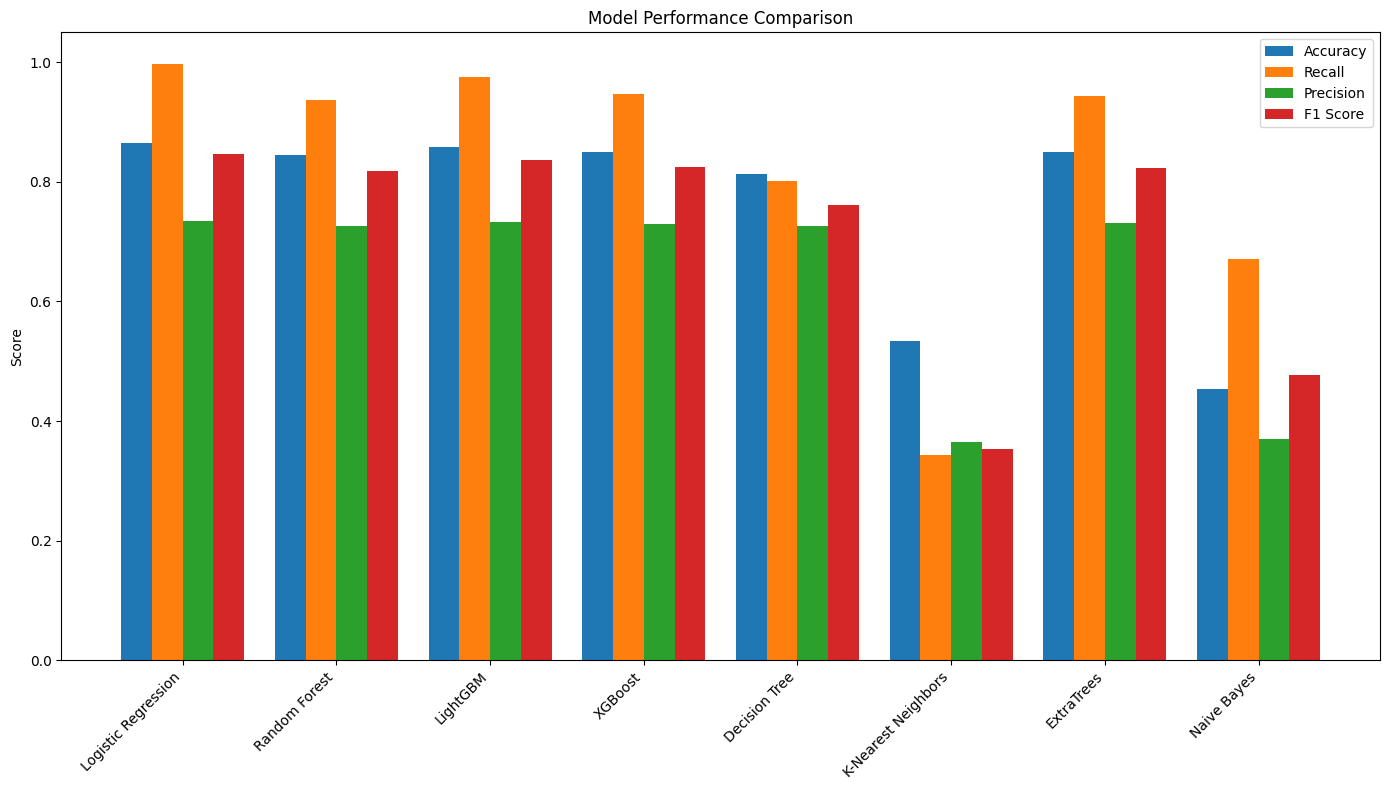

In [49]:
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'LightGBM', 'XGBoost', 'Decision Tree',
              'K-Nearest Neighbors', 'ExtraTrees', 'Naive Bayes'],
    'Accuracy': [0.8648, 0.8452, 0.8587, 0.8496, 0.8135, 0.5343, 0.8500, 0.4541],
    'Recall': [0.9969, 0.9371, 0.9751, 0.9472, 0.8012, 0.3433, 0.9442, 0.6716],
    'Precision': [0.7344, 0.7262, 0.7331, 0.7293, 0.7257, 0.3657, 0.7309, 0.3708],
    'F1 Score': [0.8458, 0.8183, 0.8369, 0.8241, 0.7616, 0.3541, 0.8240, 0.4778]
}

df = pd.DataFrame(data)

# Set the figure size
plt.figure(figsize=(14, 8))

# Number of models and metrics
n_models = len(df['Model'])
n_metrics = 4

# Positions of groups on x-axis
ind = np.arange(n_models)

# Width of each bar
width = 0.2

# Plot each metric
plt.bar(ind - 1.5*width, df['Accuracy'], width, label='Accuracy')
plt.bar(ind - 0.5*width, df['Recall'], width, label='Recall')
plt.bar(ind + 0.5*width, df['Precision'], width, label='Precision')
plt.bar(ind + 1.5*width, df['F1 Score'], width, label='F1 Score')

# Labels and axis ticks
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(ind, df['Model'], rotation=45, ha='right')
plt.ylim(0, 1.05)
plt.legend()
plt.tight_layout()

plt.show()

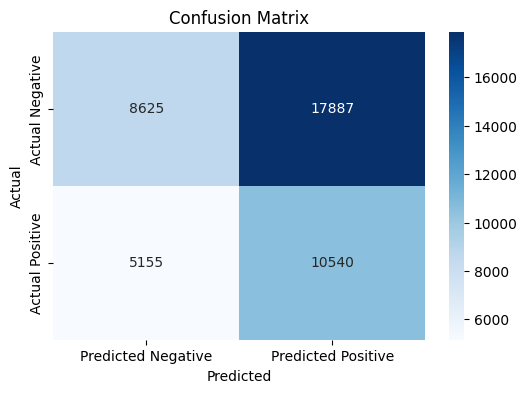

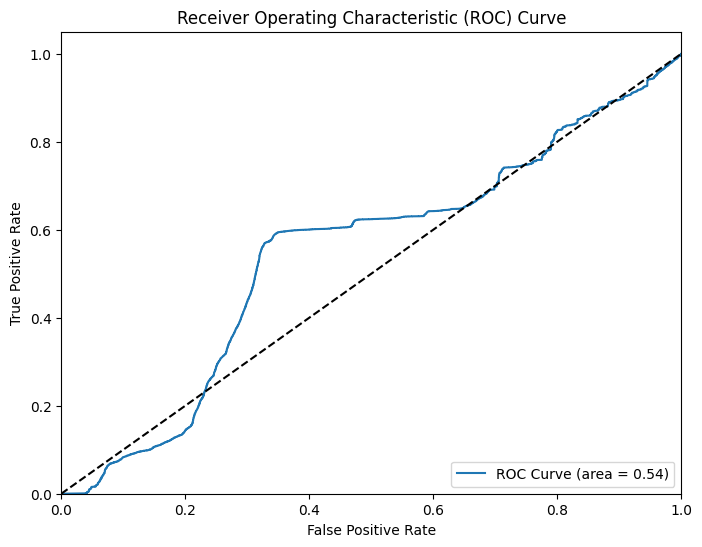

In [53]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve and AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()